In [1]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px

In [2]:
# Para activar el mostrar advertencias
warnings.simplefilter('ignore')

In [3]:

DataSalariesEurope = pd.read_excel('DataScience_salaries_2024.xlsx', sheet_name='DS_Salaries_European_Residence', header = 0)
DataSalariesEurope.head(5)

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S


In [4]:
#Experience Level: Mostly Mid-Level and Senior Level. There are hardly any Executive Level positions.
DataSalariesEurope['experience_level'].value_counts()


experience_level
MI    489
SE    482
EN    184
EX     35
Name: count, dtype: int64

In [5]:
#Employment type: Clearly, it’s Full Time. It doesn't add much more analysis to this.
DataSalariesEurope['employment_type'].value_counts()

employment_type
FT    1171
PT       9
CT       5
FL       5
Name: count, dtype: int64

In [6]:
#Job Category: 
#Data Architect/ Data Engineer = 45,42%
#Data Scientist = 31,15%
#Data Analyst  = 21,58%
#Data Manager = 1,34%
DataSalariesEurope['job_category'].value_counts()


job_category
Data Architect / Engineer    541
Data Scientist               371
Data Analyst                 262
Data Manager                  16
Name: count, dtype: int64

In [7]:
# Group by 'work_year' and calculate the mean and median of 'salary_in_euro"
salary_mean_median= DataSalariesEurope.groupby('work_year')['salary_in_euro'].agg(
    mean='mean',
    median='median'
).reset_index()

In [8]:
salary_mean_median

,work_year,mean,median
0,2020,58551.727273,51520.00
1,2021,63372.114667,57637.08
2,2022,65063.238698,58962.80
3,2023,87771.151908,69530.84
4,2024,73905.550116,61332.72


In [9]:
# Calculate the mode of each group
moda = DataSalariesEurope.groupby('work_year')['salary_in_euro'].agg(lambda x: stats.mode(x, keepdims=False).mode).reset_index().rename(columns={'salary_in_euro': 'moda'})

In [10]:
# Join the results
salary_by_year = salary_mean_median.merge(moda, on='work_year')

In [11]:
salary_by_year.round(2)

,work_year,mean,median,moda
0,2020,58551.73,51520.00,44067.08
1,2021,63372.11,57637.08,70686.36
2,2022,65063.24,58962.80,77328.76
3,2023,87771.15,69530.84,35758.56
4,2024,73905.55,61332.72,46000.00


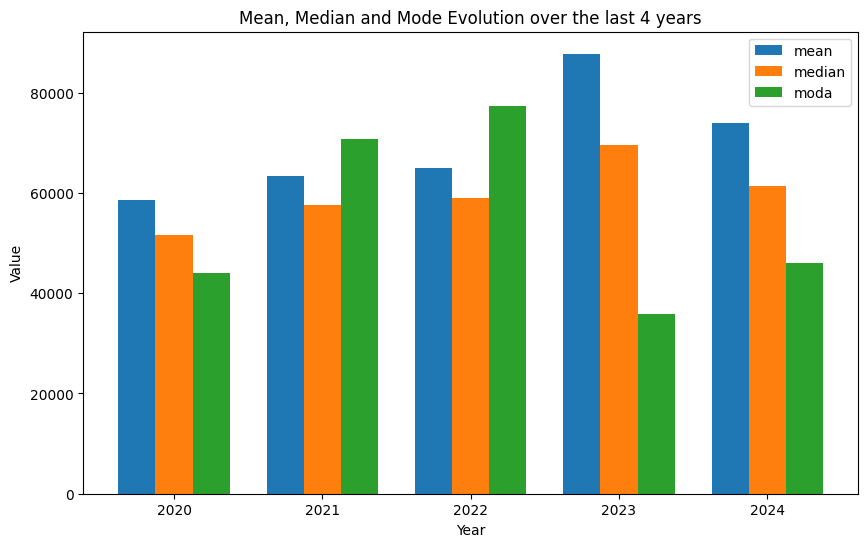

In [12]:
# Bar chart configuration
plt.figure(figsize=(10, 6))
bar_width = 0.25  # Width of each bar group
years = salary_by_year['work_year']
index = np.arange(len(years))

# Create bars for each statistic
plt.bar(index - bar_width, salary_by_year['mean'], width=bar_width, label='mean')
plt.bar(index, salary_by_year['median'], width=bar_width, label='median')
plt.bar(index + bar_width, salary_by_year['moda'], width=bar_width, label='moda')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Mean, Median and Mode Evolution over the last 4 years')
plt.xticks(index, years)
plt.legend()

# Show chart
plt.show()

#**Hypothesis 0**
In which country do the majority of data scientists in Europe reside?


In [13]:
#Country_employee_residence (TOP 10): Where do people working in DS generally live? (2020 - 2024)
#Once again, the year 2023 was the year in which these professionals grew the most in Europe.
DataSalariesEurope['country_employee_residence'].value_counts().head(10)



country_employee_residence
United Kingdom    646
Spain             131
Germany            91
France             65
Portugal           30
Netherlands        28
Italy              21
Greece             17
Lithuania          16
Poland             15
Name: count, dtype: int64

In [14]:
top_countries = DataSalariesEurope['country_employee_residence'].value_counts().head(10).index


In [15]:
#Let's look at the evolution over these 4 years:

# We filter the DataFrame to include only these 10 countries
filtered_data = DataSalariesEurope[DataSalariesEurope['country_employee_residence'].isin(top_countries)]

# Then we create the table using the pivot_table function, counting the records for each country by each year
pivot_table = pd.pivot_table(
    filtered_data,
    values='salary_in_euro',  
    index='country_employee_residence',
    columns='work_year',
    aggfunc='count'
)

# We fill in with 0 in case there are missing values for some years
pivot_table = pivot_table.fillna(0).astype(int)

# We display the final table
pivot_table


work_year,2020,2021,2022,2023,2024
country_employee_residence,,,,,
France,6,10,17,21,11
Germany,7,16,14,34,20
Greece,2,2,11,2,0
Italy,1,3,5,11,1
Lithuania,0,0,2,2,12
Netherlands,1,3,8,10,6
Poland,1,2,2,6,4
Portugal,3,1,9,13,4
Spain,3,5,43,71,9


In [16]:
#remote_ratio:  Teleworking is not as common as we might expect.
DataSalariesEurope['remote_ratio'].value_counts()

remote_ratio
0      673
100    389
50     128
Name: count, dtype: int64

In [17]:
#company_location: The companies are mostly located in the UK.
DataSalariesEurope['company_location'].value_counts().head(5)


company_location
GB    652
ES    127
DE     93
FR     58
NL     28
Name: count, dtype: int64

In [18]:
# New DataFrame to calculate the percentage of major locations where companies are recruiting data science professionals across Europe.
countries_companies = DataSalariesEurope['company_location'].value_counts().reset_index()
countries_companies['percentage'] = countries_companies['count']/ 1191*100
#countries_companies.head(10)


In [19]:
# Define the threshold and group small categories into 'Others'.
threshold = 2  # percentage threshold
main_categories = countries_companies[countries_companies['percentage'] >= threshold]
others = countries_companies[countries_companies['percentage'] < threshold]

In [20]:
# Calculate the total for the 'Others' category
others_total = others['percentage'].sum()
others_row = pd.DataFrame({'company_location': ['Others'], 'percentage': [others_total]})

# Combine the main categories with the 'Others' row using pd.concat.
main_categories = pd.concat([main_categories, others_row], ignore_index=True)

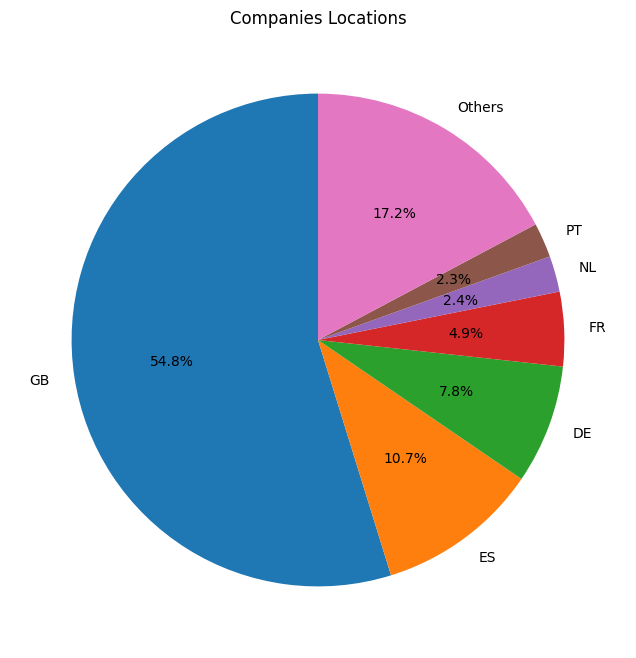

In [21]:
# Create the pie chart.
plt.figure(figsize=(8, 8))
plt.pie(main_categories['percentage'], labels=main_categories['company_location'], autopct='%1.1f%%', startangle=90)
plt.title('Companies Locations')
plt.show()

In [22]:
#company_size: They are of medium size
#We can assume annual revenue of less than 50 million Euros and between 50 and 249 employees.
DataSalariesEurope['company_size'].value_counts().head(10)

company_size
M    958
L    158
S     74
Name: count, dtype: int64